The factor model is built on the premise that observed returns of multiple assets might be driven by a common source (or common sources as in the case of multiple factor modeling).

The simplest from of factor modeling is where the market index is used as single common factor to analyze the returns of the portfolio.

Given k assets, the return of asset i is given by the well known CAPM:
$$ r_{i,t} = \alpha_i + \beta_i r^M_t + \epsilon_{i,t}$$ 
Each of the asset in the portfolio will scale the market risk based on its own beta:
$$ r_{1,t} = \alpha_1 + \beta_1 r^M_t + \epsilon_{1,t}$$ 
$$ r_{2,t} = \alpha_2 + \beta_2 r^M_t + \epsilon_{2,t}$$
$$  ......$$
$$ r_{k,t} = \alpha_k + \beta_k r^M_t + \epsilon_{k,t}$$

This can be re-written as:
$$ r_{t} = \alpha + \beta r^M_t + \epsilon_t $$
Let $r_{t} = [r_{1,t} , r_{2,t}, ..., r_{k,t}]'$, $\alpha = [\alpha_1, \alpha_2, ..., \alpha_k]' $ ,$\beta = [ \beta_1, \beta_2, ..., \beta_k]' $ and finally $\epsilon_t = [\epsilon_{1,t}, \epsilon_{2,t}, ... ,\epsilon_{k,t}]'$.
Which means that the portforlio returns of each asset at a time point t, can be summarized by the following multivariate equation:
$$\begin{bmatrix} r_{1,t} \\ r_{2,t} \\ .\\.\\ r_{k,t} \end{bmatrix} = \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ .\\.\\ \alpha_k \end{bmatrix}+ \begin{bmatrix} \beta_1 \\ \beta_2 \\ .\\.\\ \beta_k \end{bmatrix} r^M_t+ \begin{bmatrix} \epsilon_{1,t} \\ \epsilon_{2,t} \\ .\\.\\ \epsilon_{k,t} \end{bmatrix}$$

In compact form:
$$ r_{t} = \alpha + \beta r^M_t + \epsilon_t $$

The assets are assumed independent therefore $Var[\epsilon_t]$ is the $k*k$ diagonal matrix:
$$D = \begin{bmatrix} \sigma_{1}^2 & 0 & 0 & ..&0 \\ 0& \sigma_{2}^2 & 0 & ..&0\\ 0&..&..&..&0\\ 0 & 0 & 0 & ..& \sigma_{k}^2 \end{bmatrix}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('Stocks_data.txt',delim_whitespace=True)
data.head(5)

14

Since the k market equations are all assumed independent then the OLS estimates are the BLUE estimates of each asset coeffients.

In [70]:
alpha_hat = np.zeros(13)
beta_hat = np.zeros(13)
sigma2_hat = np.zeros(13)
i = 0
names = []
for column_name in data:
    if column_name == 'SP5' : break
    names.append(column_name)
    y = data[column_name]
    x = sm.add_constant(data['SP5'])
    model = sm.OLS(y, x).fit()
    alpha_hat[i]= model.params[0]
    beta_hat[i] = model.params[1]
    sigma2_hat[i]  = (np.sum(model.resid**2))/(len(data[column_name])-2)
    i = i + 1


In [72]:
results = {
    'Asset' : names,
    'Intercept' : alpha_hat,
    'Risk Beta' : beta_hat,
    'Variances' : sigma2_hat
}
Estimates = pd.DataFrame(results)
Estimates.head(13)

,Asset,Intercept,Risk Beta,Variances
0,AA,0.549124,1.291591,59.198460
1,AGE,0.721806,1.514136,60.956514
2,CAT,0.839352,0.940693,59.667413
3,F,0.454364,1.219245,67.910311
4,FDX,0.799579,0.805117,78.390725
5,GM,0.198202,1.045702,66.098762
6,HPQ,0.683568,1.627951,89.667117
7,KMB,0.546302,0.549805,36.846100
8,MEL,0.884926,1.122871,37.454827
9,NYT,0.490412,0.770649,43.432899


In [83]:
np.sqrt(Estimates['Variances'])

0      7.694054
1      7.807465
2      7.724468
3      8.240771
4      8.853854
5      8.130114
6      9.469272
7      6.070099
8      6.120035
9      6.590364
10     6.458878
11     7.215148
12    11.473988
Name: Variances, dtype: float64

The portfolio covariance is of particular importance  which can be obtained from the multivariate equation, noticing that:
$$Var[r_t] = Var[\beta r^M_{t}] + Var[\epsilon_t] = \beta Var[r^M_{t}] \beta' + D$$
Since this is a single factor model the variance of $r^M_{t}$ is just the scalar $\sigma^2_{M}$, assuming stationarity of the market index.
$$ \Sigma = \sigma^2_{M}\beta\beta' + D

In [96]:
B = np.matrix(Estimates['Risk Beta'])

D = np.diag(Estimates['Variances'])
Sigma = np.transpose(B)*np.var(data['SP5'])*B+D
s = np.sqrt(np.diag(Sigma))
Sigma/np.outer(s,s)

matrix([[1.        , 0.3766407 , 0.27301954, 0.3158194 , 0.21439079,
         0.2848152 , 0.34966822, 0.21365877, 0.36429102, 0.26439898,
         0.17542712, 0.23154978, 0.32854818],
        [0.3766407 , 1.        , 0.29867485, 0.34549655, 0.23453682,
         0.31157893, 0.38252611, 0.23373601, 0.39852299, 0.28924422,
         0.19191179, 0.25330823, 0.35942145],
        [0.27301954, 0.29867485, 1.        , 0.25044376, 0.1700112 ,
         0.22585753, 0.27728576, 0.16943071, 0.2888816 , 0.20966753,
         0.13911314, 0.18361822, 0.26053764],
        [0.3158194 , 0.34549655, 0.25044376, 1.        , 0.19666297,
         0.26126404, 0.32075441, 0.19599148, 0.33416806, 0.24253602,
         0.16092118, 0.2124031 , 0.30138077],
        [0.21439079, 0.23453682, 0.1700112 , 0.19666297, 1.        ,
         0.17735644, 0.21774087, 0.13304682, 0.22684659, 0.16464311,
         0.10923971, 0.14418768, 0.20458927],
        [0.2848152 , 0.31157893, 0.22585753, 0.26126404, 0.17735644,
         1.

Given that the covariance of the assets is estimated one can find the Global Minimum Variance Portfolio; GMVP, assigns wieghts to the securities in a way that gives the minimum risk.
The unkown weight vector in this case $\omega$ will solve the optimization problem:
$$ \min \sigma^2_p = \omega' \Sigma_p \omega$$ 
Subject to the constraint:
$\omega' 1  = 1$, where $1$ is a vector of ones of size k.

The solution is given by the formula:
$$ \omega = \frac{\Sigma_p^{-1} 1}{1' \Sigma_p^{-1} 1}$$

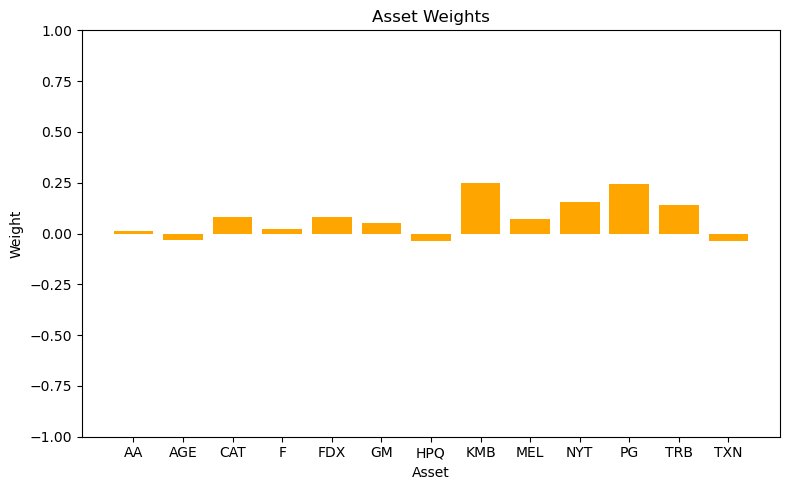

In [ ]:
#np.linalg.inv(Sigma)
Sigma = np.matrix(Sigma)
ones = np.zeros(13) + 1
ones = np.matrix(ones)
O = ones*np.linalg.inv(Sigma)*np.transpose(ones)
omega_f = np.linalg.inv(Sigma)*np.transpose(ones)/O
omega_f = np.array(omega_f)
omega_f = omega_f.flatten()
factor_model = {
    'Asset': names,
    'Weights' : np.transpose(omega_f)
}
factor_model = pd.DataFrame(factor_model)

plt.figure(figsize=(8, 5))
plt.bar(factor_model['Asset'], factor_model['Weights'], color = 'orange')
plt.title('Asset Weights')
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.ylim(-1, 1)  
plt.tight_layout()

# Show the plot
plt.show()






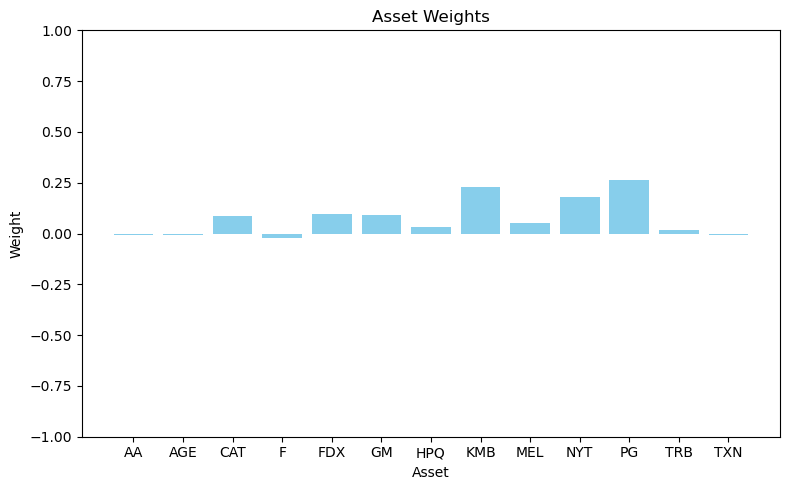

In [140]:
df = data.drop(columns='SP5')
E_Sigma=np.matrix(df.cov())
O = ones*np.linalg.inv(E_Sigma)*np.transpose(ones)
omega_emp = np.linalg.inv(E_Sigma)*np.transpose(ones)/O
omega_emp = np.array(omega_emp)
omega_emp = omega_emp.flatten()
Emp_Estimate = {
    'Asset': names,
    'Weights' : np.transpose(omega_emp)
}
Emp_Estimate = pd.DataFrame(Emp_Estimate)

plt.figure(figsize=(8, 5))
plt.bar(Emp_Estimate['Asset'], Emp_Estimate['Weights'], color = 'skyblue')
plt.title('Asset Weights')
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.ylim(-1, 1)  
plt.tight_layout()

# Show the plot
plt.show()


The two results differ significantly in the way they handle the TRB stock assiging different weights. But they ovareall agree in assigning the highest weights to the same three stocks.